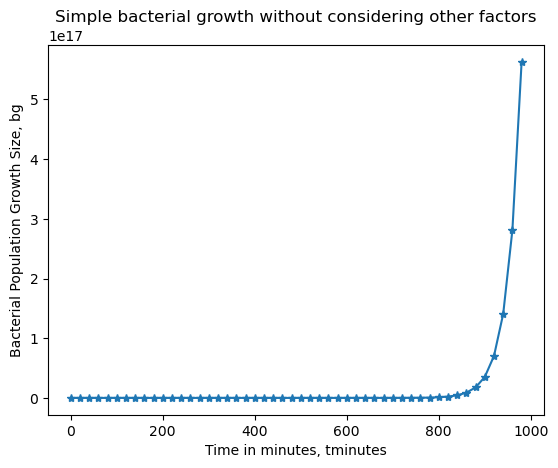

In [1]:
# Growth of Ecoli vs time in minutes without considering external factors
from pylab import *

N = 50
bg = zeros(N)
tminutes = zeros(N)

#Intialize Lower Limit
bg[0] = 1000

tincrement = 20 
for n in range(1, N):
    bg[n] = 2*bg[n-1]
    tminutes[n] = tminutes[n-1] + tincrement

plot(tminutes, bg, '*-')
xlabel('Time in minutes, tminutes')
ylabel('Bacterial Population Growth Size, bg')
title("Simple bacterial growth without considering other factors")
show()

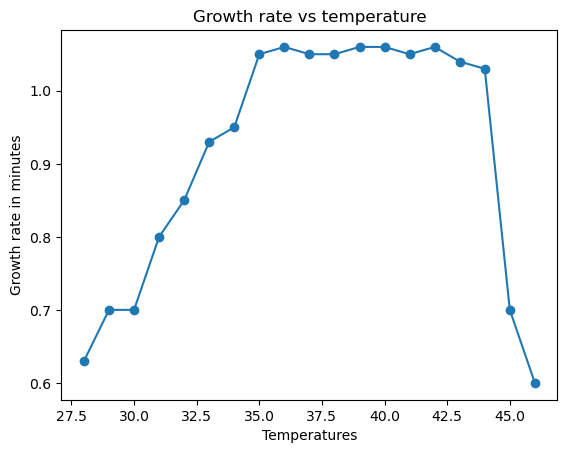

In [2]:
#Growth rate of EColi at different temperatures - bacterial growth phases
#Stagnated, growth and death
from pylab import *

time_bg_files = ['ecoli_temperatures.csv']
growth_rate_arr = []


for time_bg_file in time_bg_files:
    t, bg = loadtxt(time_bg_file, delimiter=',', unpack=True)
    #generation_rate = (log10(e[-1]) - log10(e[0])) / (t[-1] - t[0])
    #growth_rate_arr.append(generation_rate)

plot(t, bg, 'o-')
xlabel('Temperatures')
ylabel('Growth rate in minutes')
title("Growth rate vs temperature")
show()

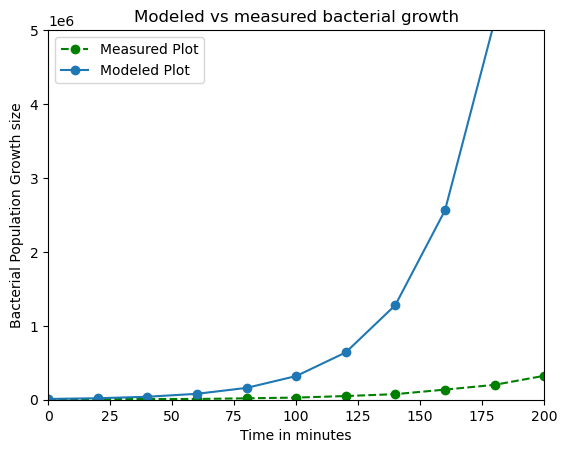

In [3]:
#Model vs Measured E Coli growth rate

from pylab import *

N1 = 13

tminutes1 = zeros(N1)
tincrement1 = 20  
bg1 = zeros(N1)
bg1[0] = 10000

for n in range(1, N1):
    bg1[n] = 2*bg1[n-1]
    tminutes1[n] = tminutes1[n-1] + tincrement1

time_measured, bg_measured = loadtxt('ecoli_modeled.csv', delimiter=",", unpack=True)

xlim(0, 200)
ylim(0, 5e6)
plot(time_measured, bg_measured, "g--o", label="Measured Plot")
plot(tminutes1, bg1, 'o-', label="Modeled Plot")
xlabel('Time in minutes')
ylabel('Bacterial Population Growth size')
title("Modeled vs measured bacterial growth")
legend(loc="upper left")
show()

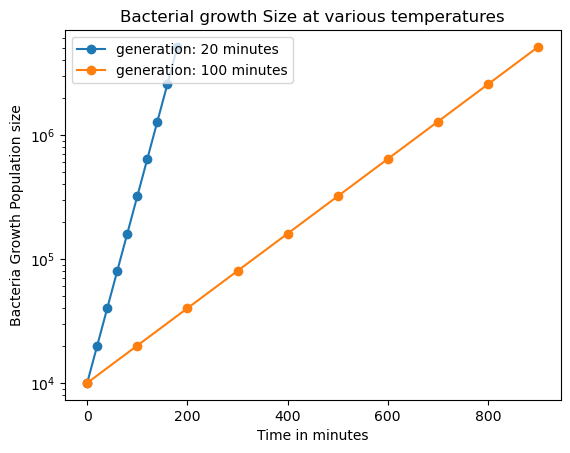

In [4]:
#E Coli growth rate at different generation times
from pylab import *

count = 10

bg1 = zeros(count)
tminutes1 = zeros(count)
bg1[0] = 10000

generation_time = 20
for n in range(1, count):
    bg1[n] = 2*bg1[n-1]
    tminutes1[n] = tminutes1[n-1] + generation_time

bg2 = zeros(count)
tminutes2 = zeros(count)
bg2[0] = 10000

generation_time = 100
for n in range(1, count):
    bg2[n] = 2*bg2[n-1]
    tminutes2[n] = tminutes2[n-1] + generation_time


plot(tminutes1, bg1, "-o", label="generation: 20 minutes")
plot(tminutes2, bg2, "-o", label="generation: 100 minutes")

yscale("log")
legend(loc="upper left")
xlabel("Time in minutes")
ylabel("Bacteria Growth Population size")
title("Bacterial growth Size at various temperatures")
show()

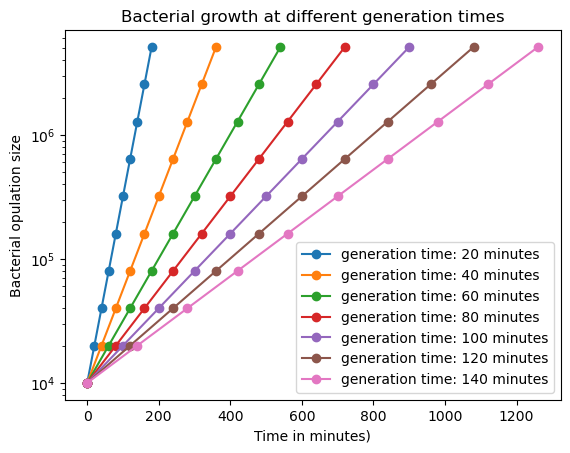

In [5]:
from pylab import *

i = 10
generation_time_list = [20, 40, 60, 80, 100, 120, 140]
# Outer for loop, looping over different generation times
for generation_time in generation_time_list:
    bg = zeros(i)
    tminute = zeros(i)
    bg[0] = 10000
    # Inner for loop, looping over each generation
    for n in range(1, i):
        bg[n] = 2*bg[n-1]
        tminute[n] = tminute[n-1] + generation_time

    # Creating a string with the generation time to use as a label in the plot
    plot(tminute, bg, "-o", label="generation time: " + str(generation_time) + " minutes")

yscale("log")
legend(loc="lower right")
xlabel("Time in minutes)")
ylabel("Bacterial opulation size")
title("Bacterial growth at different generation times")
show()

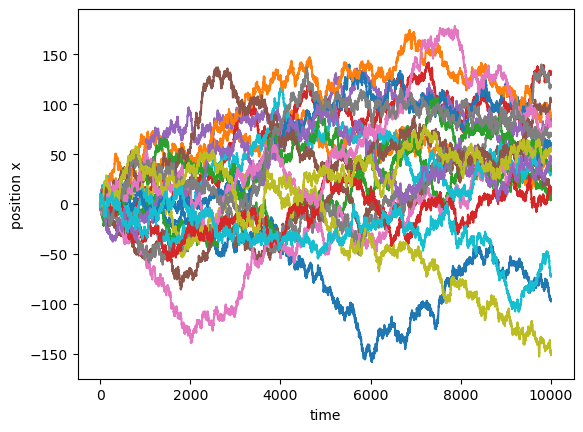

In [6]:
#E Coli Random walk simulation
import numpy as np
import matplotlib.pyplot as plt
def func_random_walk(count, T, meu=0, sig=1):
  steps = np.random.normal(meu, sig, size=(count, T))
  #print(steps)
  s_val = np.cumsum(steps,axis=1)
  return s_val

def random_walk_val_plot(sm_val, nsims=10):
  plt.figure()
  plt.plot(sm_val[:nsims, :].T)
  plt.xlabel('time')
  plt.ylabel('position x')
  plt.show()

np.random.seed(2500) 

sm_val = func_random_walk(1000, 10000,  meu=0, sig=1)
random_walk_val_plot(sm_val, nsims=20)

In [9]:
#*************  E Coli Baterial growth vs time Animated **********
%matplotlib osx

import matplotlib.pyplot as plt
import numpy as np
from pylab import *

N = 10
generation_time_list = [20, 40, 60, 80, 100]

from matplotlib.animation import FFMpegWriter
metadata = dict(title='Final Project animation in 2D', artist='Matplotlib',comment='Bacterial Growth.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()

N = 10
generation_time_list = [20]
for generation_time in generation_time_list:
    bg = zeros(N)
    t = zeros(N)
    bg[0] = 10000
    for n in range(1, N):
        bg[n] = 2*bg[n-1]
        
with writer.saving(fig, "animation.mp4", dpi=200): 
    for j in range(100):
        v = generation_time_list[j] + 20 
        generation_time_list.append(v)
    for generation_time in generation_time_list:
    # Inner for loop, looping over each generation
        for n in range(1, N):
            t[n] = t[n-1] + generation_time
        plt.clf()
        plt.xlim(0,30000)
        plt.xlabel('Time (minutes)',fontsize=10)
        plt.ylabel('Population size',fontsize=10)
        plt.title('Modeled bacterial growth at different generation times',fontsize=10)
        plt.plot(t,bg, 'ro-',mfc='w')
        plt.show()
        plt.draw()
        plt.pause(0.05)
        writer.grab_frame()

In [2]:
#*************  E Coli Baterial growth random walk Animated **********
%matplotlib osx

import matplotlib.pyplot as plt
import numpy as np
from pylab import *

N = 5

from matplotlib.animation import FFMpegWriter
metadata = dict(title='Final Project animation in 2D', artist='Matplotlib',comment='Random Walk Animate.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()

#Random walk for E Coli
def func_random_walk(count, T, mu=0, sig=1):
    steps = np.random.normal(mu, sig, size=(count, T))
    #print(steps)
    sim = np.cumsum(steps,axis=1)
    #print(sim)
    return sim

def random_walk_val_plot(sims, nsims=10):
    plt.clf()
    plt.figure()
    plt.plot(sim[:nsims, :].T)
    plt.xlabel('time')
    plt.ylabel('position x')
    plt.show()
    plt.draw()
    plt.pause(0.05)

N = 10
generation_time_list = [20]

####
# np.random.seed(2020) 
# sim = random_walk_simulator(1000, 10000,  mu=0, sigma=1)

# s_list = []
# for i in range(10):
#     s_list.append(sim[i])
    
# print(s_list)

s_list = np.zeros([10,10000])
# s_list = []

# for r in range(10):
#     s_list.append(np.zeros(10000))
####

with writer.saving(fig, "animation_123.mp4", dpi=200): 
        for n in range(N):
            s_copy = s_list.copy()
            s_list = []

#             for r in range(10):
#                 s_list.append(np.zeros(10000))      
            
            mu_list = []
            for j in range(10):
                mu_list.append(s_copy[j][-1])
            
            for s in range(10):
                s_list.append(func_random_walk(1, 10000, mu=mu_list[s], sig=1))
            
#             print(s_list)
#             if mu_list[0] == 0:
#                 print("This is mu list length---->", 1)
#             else:
#                 print("This is mu list length---->", len(mu_list[0]))
                
            plt.clf()
#             np.random.seed(2020) 
#             sim = random_walk_simulator(1000, 10000,  mu=sim[-1], sigma=1)
#             print(sim)
#             plot_random_walk_sims(sim, nsims=10)

            plt.figure()
            for t in range(10):
                plt.plot(s_list[t][0])
                
            plt.xlabel('time')
            plt.ylabel('position x')
            plt.xlim(0,10000)
#             plt.ylim(-1e10,1e10)
            if n <=2:
                plt.ylim(-10000,10000)
            else:
                plt.ylim(-1e10,1e10)

            plt.show()
            plt.draw()
            plt.pause(0.05)


            writer.grab_frame()
